## Importing Dependencies

In [1]:
from plotly.offline import plot, iplot, init_notebook_mode
import plotly.graph_objs as go
init_notebook_mode(connected=True)

In [2]:
pip install plotly==5.10.0

Note: you may need to restart the kernel to use updated packages.


You are using pip version 9.0.3, however version 22.2.2 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


In [3]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import  OneHotEncoder, StandardScaler, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, ConfusionMatrixDisplay, RocCurveDisplay
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning) # to avoid deprecation warnings

import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio
# setting Jedha color palette as default
pio.templates["jedha"] = go.layout.Template(
    layout_colorway=["#4B9AC7", "#4BE8E0", "#9DD4F3", "#97FBF6", "#2A7FAF", "#23B1AB", "#0E3449", "#015955"]
)
pio.templates.default = "jedha"
pio.renderers.default = "svg" 

### Importing and reading Data 

In [4]:
df = pd.read_csv(r"C:\Users\s_sad\Downloads\Life Expectancy Data.csv")

In [5]:
df.head()
df.info()
df.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life expectancy                  2928 non-null   float64
 4   Adult Mortality                  2928 non-null   float64
 5   infant deaths                    2938 non-null   int64  
 6   Alcohol                          2744 non-null   float64
 7   percentage expenditure           2938 non-null   float64
 8   Hepatitis B                      2385 non-null   float64
 9   Measles                          2938 non-null   int64  
 10   BMI                             2904 non-null   float64
 11  under-five deaths                2938 non-null   int64  
 12  Polio               

(2938, 22)

In [6]:
num_data=df.select_dtypes(include=np.number)
cat_data=df.select_dtypes(include='object')

## Description of Variables

1.country (Nominal)

2.year (Ordinal) - the calendar year the indicators are from (ranging from 2000 to 2015)

3.status (Nominal) - whether a country is considered to be 'Developing' or 'Developed' by WHO standards

4.life_expectancy (Ratio) - the life expectancy of people in years for a particular country and year

5.adult_mortality (Ratio) - the adult mortality rate per 1000 population (i.e. number of people dying between 15 and 60 years per 1000 population); if the rate is 263 then that means 263 people will die out of 1000 between the ages of 15 and 60; another way to think of this is that the chance an individual will die between 15 and 60 is 26.3%

6.infant_deaths (Ratio) - number of infant deaths per 1000 population; similar to above, but for infants

7.alcohol (Ratio) - a country's alcohol consumption rate measured as liters of pure alcohol consumption per capita

8.percentage_expenditure (Ratio) - expenditure on health as a percentage of Gross Domestic Product (gdp)

9.hepatitis_b (Ratio) - number of 1 year olds with Hepatitis B immunization over all 1 year olds in population

10.measles (Ratio) - number of reported Measles cases per 1000 population

11.bmi (Interval/Ordinal) - average Body Mass Index (BMI) of a country's total population

12.under-five_deaths (Ratio) - number of people under the age of five deaths per 1000 population

13.polio (Ratio) - number of 1 year olds with Polio immunization over the number of all 1 year olds in population

14.total_expenditure (Ratio) - government expenditure on health as a percentage of total government expenditure

15.diphtheria (Ratio) - Diphtheria tetanus toxoid and pertussis (DTP3) immunization rate of 1 year olds

16.hiv/aids (Ratio) - deaths per 1000 live births caused by HIV/AIDS for people under 5; number of people under 5 who die due to HIV/AIDS per 1000 births

17.gdp (Ratio) - Gross Domestic Product per capita

18.population (Ratio) - population of a country

19.thinness_1-19_years (Ratio) - rate of thinness among people aged 10-19 (Note: variable should be renamed to thinness_10-19_years to more accurately represent the variable)

21.thinness_5-9_years (Ratio) - rate of thinness among people aged 5-9

22.income_composition_of_resources (Ratio) - Human Development Index in terms of income composition of resources (index ranging from 0 to 1)

23.schooling (Ratio) - average number of years of schooling of a population

### Standardizing columns 

In [7]:
# converting column names to lower case
df.columns = df.columns.str.lower()

In [8]:
# renaming- formatting
df.rename(columns={'life expectancy ' : 'life expectancy', ' bmi ' : 'bmi', 'under-five deaths ': 'under-five deaths',
                  'measles ': 'measles',' thinness  1-19 years': 'thinness 1-19 years', ' thinness 5-9 years':'thinness 5-9 years', ' hiv/aids': 'hiv/aids',
                  'diphtheria ': 'diphtheria'},inplace = True)

In [9]:
# removing spaces and replacing them with underscore(_)
df.columns = df.columns.map(lambda x:x.replace(" ","_"))

### Data Cleaning 

### Checking and dealing with Nan values 

In [10]:
df.isna().sum()

country                              0
year                                 0
status                               0
life_expectancy                     10
adult_mortality                     10
infant_deaths                        0
alcohol                            194
percentage_expenditure               0
hepatitis_b                        553
measles                              0
bmi                                 34
under-five_deaths                    0
polio                               19
total_expenditure                  226
diphtheria                          19
hiv/aids                             0
gdp                                448
population                         652
thinness_1-19_years                 34
thinness_5-9_years                  34
income_composition_of_resources    167
schooling                          163
dtype: int64

### KNN Imputer to replace Nan values 

In [11]:
num_data=df.select_dtypes(include=np.number)
cat_data=df.select_dtypes(include='object')

from sklearn.impute import KNNImputer
knn=KNNImputer()
new_num_data=knn.fit_transform(num_data)
num_data=pd.DataFrame(new_num_data,columns=num_data.columns)
df=pd.merge(cat_data,num_data,left_index=True,right_index=True)
df

,country,status,year,life_expectancy,adult_mortality,infant_deaths,alcohol,percentage_expenditure,hepatitis_b,measles,...,polio,total_expenditure,diphtheria,hiv/aids,gdp,population,thinness_1-19_years,thinness_5-9_years,income_composition_of_resources,schooling
0,Afghanistan,Developing,2015.0,65.0,263.0,62.0,0.01,71.279624,65.0,1154.0,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,Developing,2014.0,59.9,271.0,64.0,0.01,73.523582,62.0,492.0,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,Developing,2013.0,59.9,268.0,66.0,0.01,73.219243,64.0,430.0,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,Developing,2012.0,59.5,272.0,69.0,0.01,78.184215,67.0,2787.0,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,Developing,2011.0,59.2,275.0,71.0,0.01,7.097109,68.0,3013.0,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,Zimbabwe,Developing,2004.0,44.3,723.0,27.0,4.36,0.000000,68.0,31.0,...,67.0,7.13,65.0,33.6,454.366654,12777511.0,9.4,9.4,0.407,9.2
2934,Zimbabwe,Developing,2003.0,44.5,715.0,26.0,4.06,0.000000,7.0,998.0,...,7.0,6.52,68.0,36.7,453.351155,12633897.0,9.8,9.9,0.418,9.5
2935,Zimbabwe,Developing,2002.0,44.8,73.0,25.0,4.43,0.000000,73.0,304.0,...,73.0,6.53,71.0,39.8,57.348340,125525.0,1.2,1.3,0.427,10.0
2936,Zimbabwe,Developing,2001.0,45.3,686.0,25.0,1.72,0.000000,76.0,529.0,...,76.0,6.16,75.0,42.1,548.587312,12366165.0,1.6,1.7,0.427,9.8


The assumption behind using KNN for missing values is that a point value can be approximated by the values of the points that are closest to it, based on other variables.Moreover it does not tend to reduce variance of data as opposite to mean. 

In [12]:
df.isna().sum() # nan values has been replaced with KNN imputer

country                            0
status                             0
year                               0
life_expectancy                    0
adult_mortality                    0
infant_deaths                      0
alcohol                            0
percentage_expenditure             0
hepatitis_b                        0
measles                            0
bmi                                0
under-five_deaths                  0
polio                              0
total_expenditure                  0
diphtheria                         0
hiv/aids                           0
gdp                                0
population                         0
thinness_1-19_years                0
thinness_5-9_years                 0
income_composition_of_resources    0
schooling                          0
dtype: int64

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   country                          2938 non-null   object 
 1   status                           2938 non-null   object 
 2   year                             2938 non-null   float64
 3   life_expectancy                  2938 non-null   float64
 4   adult_mortality                  2938 non-null   float64
 5   infant_deaths                    2938 non-null   float64
 6   alcohol                          2938 non-null   float64
 7   percentage_expenditure           2938 non-null   float64
 8   hepatitis_b                      2938 non-null   float64
 9   measles                          2938 non-null   float64
 10  bmi                              2938 non-null   float64
 11  under-five_deaths                2938 non-null   float64
 12  polio               

In [14]:
df.year = df.year.astype(int) 

After using imputer datatype of "year" has been changed to "float", therefore changed it back to "integer"

### Outliers

In [15]:
df.describe()

,year,life_expectancy,adult_mortality,infant_deaths,alcohol,percentage_expenditure,hepatitis_b,measles,bmi,under-five_deaths,polio,total_expenditure,diphtheria,hiv/aids,gdp,population,thinness_1-19_years,thinness_5-9_years,income_composition_of_resources,schooling
count,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2.938000e+03,2938.000000,2938.000000,2938.000000,2938.000000
mean,2007.518720,69.237393,164.690265,30.303948,4.581121,738.251295,80.939210,2419.592240,38.263165,42.035739,82.559088,5.942407,82.347515,1.742103,6745.199237,1.211352e+07,4.855242,4.884588,0.625453,11.948257
std,4.613841,9.512523,124.142937,117.926501,3.963506,1987.914858,23.548364,11467.272489,19.978582,160.445548,23.370236,2.432286,23.657819,5.077785,13345.459976,5.546108e+07,4.403705,4.491457,0.208490,3.330643
min,2000.000000,36.300000,1.000000,0.000000,0.010000,0.000000,1.000000,0.000000,1.000000,0.000000,3.000000,0.370000,2.000000,0.100000,1.681350,3.400000e+01,0.100000,0.100000,0.000000,0.000000
25%,2004.000000,63.200000,74.000000,0.000000,1.032500,4.685343,75.600000,0.000000,19.400000,0.000000,78.000000,4.340000,78.000000,0.100000,458.986066,3.570380e+05,1.600000,1.600000,0.491000,10.000000
50%,2008.000000,72.100000,144.000000,3.000000,3.760000,64.912906,91.000000,17.000000,43.150000,4.000000,93.000000,5.760000,93.000000,0.100000,1633.278133,1.952342e+06,3.400000,3.400000,0.674000,12.300000
75%,2012.000000,75.675000,227.000000,22.000000,7.560000,441.534144,96.000000,360.250000,56.100000,28.000000,97.000000,7.427500,97.000000,0.800000,5368.157643,8.117433e+06,7.200000,7.200000,0.776000,14.200000
max,2015.000000,89.000000,723.000000,1800.000000,17.870000,19479.911610,99.000000,212183.000000,87.300000,2500.000000,99.000000,17.600000,99.000000,50.600000,119172.741800,1.293859e+09,27.700000,28.600000,0.948000,20.700000


We will try to have a look on outliers for few of the variables. 

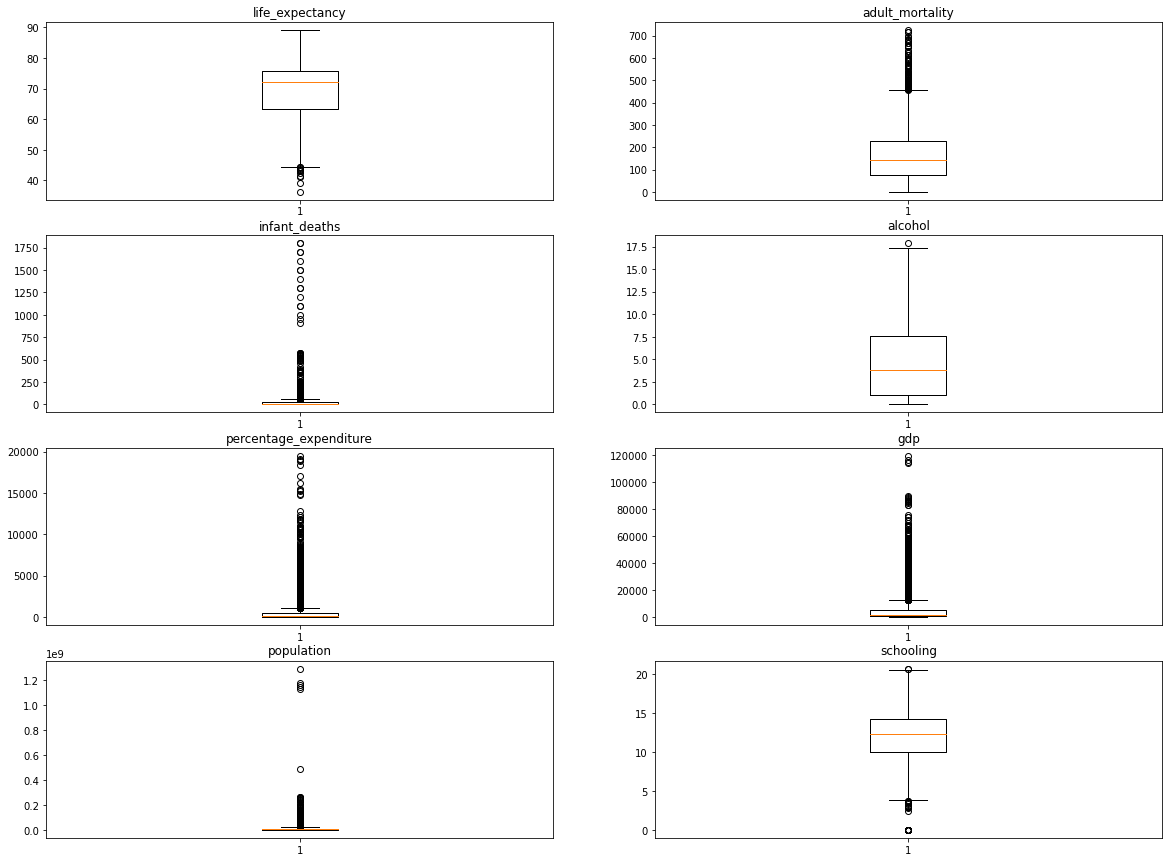

In [16]:
#checking outliers in numerical data
fig, axs = plt.subplots(4,2, figsize=(20,15))

axs[0, 0].boxplot(df['life_expectancy'])
axs[0, 1].boxplot(df['adult_mortality'])
axs[1, 0].boxplot(df['infant_deaths'])
axs[1, 1].boxplot(df['alcohol'])
axs[2, 0].boxplot(df['percentage_expenditure'])
axs[2, 1].boxplot(df['gdp'])
axs[3, 0].boxplot(df['population'])
axs[3, 1].boxplot(df['schooling'])

axs[0, 0].title.set_text('life_expectancy')
axs[0, 1].title.set_text('adult_mortality')
axs[1, 0].title.set_text('infant_deaths')
axs[1, 1].title.set_text('alcohol')
axs[2, 0].title.set_text('percentage_expenditure')
axs[2, 1].title.set_text('gdp')
axs[3, 0].title.set_text('population')
axs[3, 1].title.set_text('schooling')
plt.show()

It looks like there are too many outliers in data, so we decided not to remove them, as it will reduce our dataset to large extent. 

### Exploratory Data Analysis

In order to make a comparsion at continent level, new column namely continent has been created, pycountry was not able to recognize "Timor-Leste". So I checked that Timor-Leste had 0.05% of obs. as compared to whole dataset, which is very less, so I decied to remove the country from analysis. There were other country names in data sets which were slightly different then names in pycountry, so I changed them according to library requirement. 

In [17]:
indexNames = df[df['country'] == 'Timor-Leste' ].index
df.drop(indexNames , inplace=True)  #droping all rows linked with Timor-Leste

In [18]:
(df.country=='Timor-Leste').sum()/len(df) # checking if there drop was successful

0.0

In [19]:
#changing names of countries in dataset according to pycountry library.
df.replace(['Bolivia (Plurinational State of)','Iran (Islamic Republic of)', 'Micronesia (Federated States of)','Republic of Korea','The former Yugoslav republic of Macedonia', 
            'Venezuela (Bolivarian Republic of)'],
           ['Bolivia','Iran','Micronesia','South Korea','Republic of North Macedonia',
           'Bolivarian Republic of Venezuela'], inplace=True)

In [20]:
# creating column continent
import pycountry_convert as pc
import pycountry
def convert(row):
    cn_code = pc.country_name_to_country_alpha2(row.country)
    conti_code = pc.country_alpha2_to_continent_code(cn_code)
    return conti_code
df['continent'] = df.apply(convert, axis=1)

### How is life expectancy is correlated with other features?

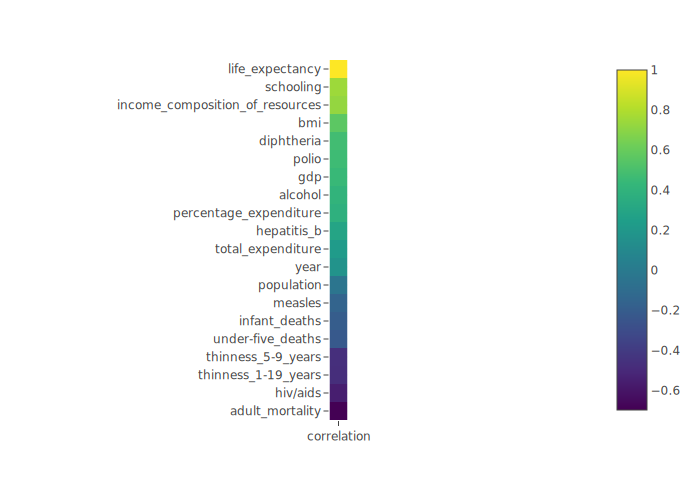

In [21]:
corr = df.corr().loc["life_expectancy"].to_frame().iloc[0:20]
corr = corr.rename(columns={"index":"feature", "life_expectancy":"correlation"})
corr = corr["correlation"].sort_values(ascending=False).to_frame()

px.imshow(corr)

1. schooling is highly positively correlated with life_expectancy, which makes sense. 
2. adult_mortality is highly negatively correlated with life_expectancy(also makes sense).
3. according to definition of (dihtheria, polio and Hepatitis_b) in the dataset, their positive relation with life_expectancy does not make sense. Alchol also seems to be positively related with LE, which is also not logically true. except these variables rest of variables have a logically valid relationship with life expectancy.  

#### Life expectancy over the years (developed vs. developing) 

With some datasets, you may want to understand changes in one variable as a function of time, or a similarly continuous variable. In this situation, a good choice is to draw a relplot

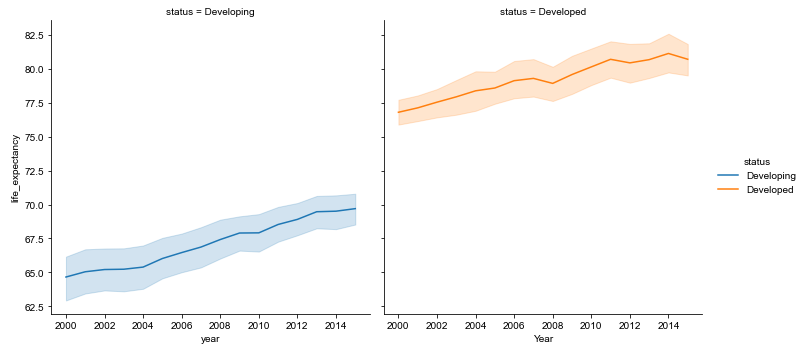

In [22]:
import seaborn as sns
sns.relplot(x="year", y="life_expectancy", kind="line",hue = 'status', col = 'status',data=df)
#plt.title("Life expectancy anual evolution", fontsize=12)
sns.set_style("white")
plt.xlabel("Year")
plt.ylabel("Life expectancy (years)")
plt.show()

Plots shows that life_expectancy has improved over the years both for developing and developed countries. 

#### Adult Mortality and life expectancy

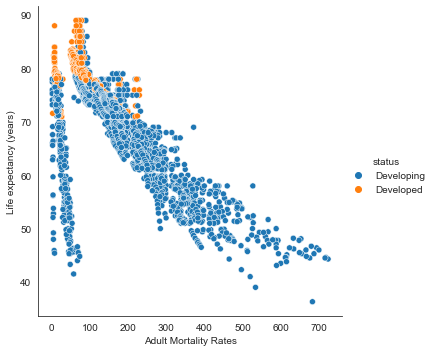

In [23]:
sns.relplot(x="adult_mortality", y="life_expectancy", hue='status', data=df)
sns.set_style("white")
plt.xlabel("Adult Mortality Rates")
plt.ylabel("Life expectancy (years)")
plt.show()

LE is linked negatively with adult_mortality for developing and developed countries. 

#### Country & Continental Wise Life expectancy over the years

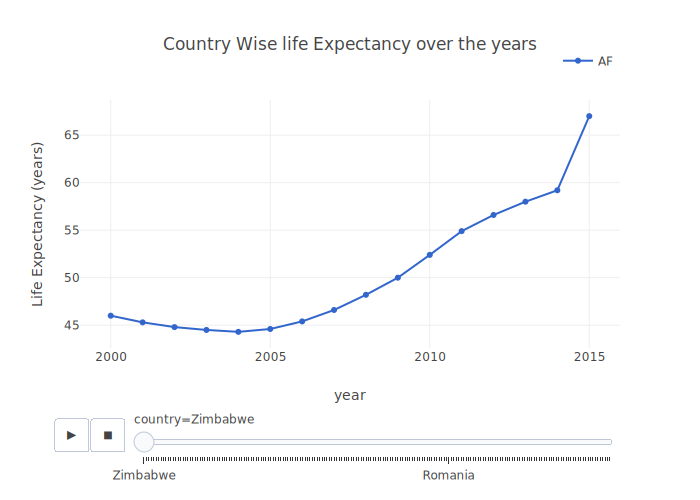

In [24]:
fig= px.line(df.sort_values(by='year'),x='year',y='life_expectancy',
             animation_frame='country',animation_group='year',color='continent',markers=True,
             color_discrete_sequence=px.colors.qualitative.G10,
             title="Country Wise life Expectancy over the years",
             labels=dict(continent="Continent",
                         life_expectancy="Life Expectancy (years)"))


fig.update_layout(font_family="Rockwell",
                  legend=dict(orientation="h", title="", y=1.1, x=1, xanchor="right", yanchor="bottom"))
fig.show()

#### Life expactany & per-capita-gdp

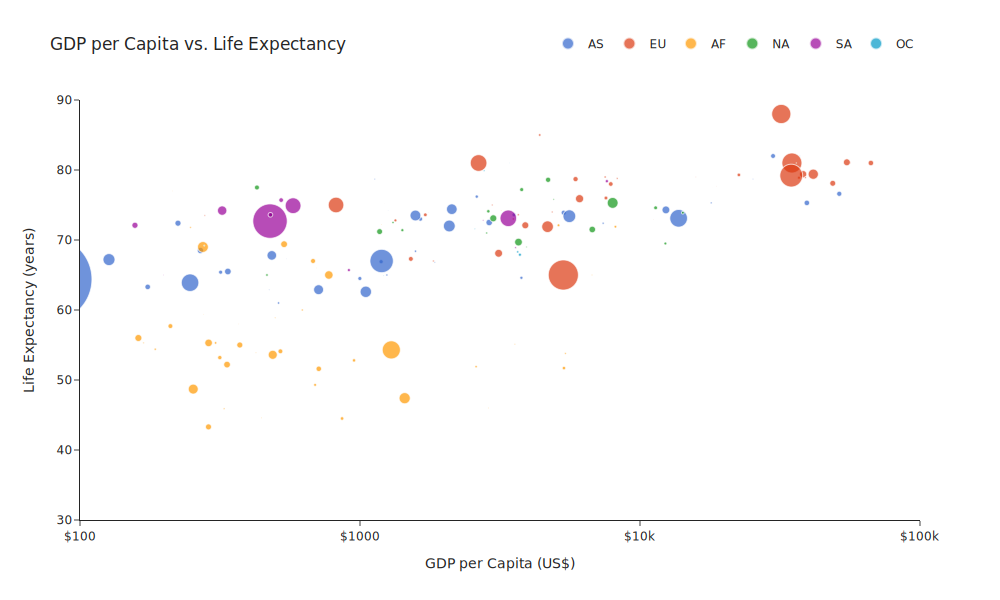

In [25]:
df2 = df[(df["year"] == 2005)] # just took one year
fig = px.scatter(df2, y="life_expectancy", x="gdp", color="continent",log_x = True, size="population", size_max=60,
                 hover_name="country", height=600, width=1000, template="simple_white", 
                 color_discrete_sequence=px.colors.qualitative.G10,
                 title="GDP per Capita vs. Life Expectancy",
                 labels=dict(
                     continent="Continent", pop="Population",
                     gdp="GDP per Capita (US$)", 
                     life_expectancy="Life Expectancy (years)"))

fig.update_layout(font_family="Rockwell",
                  legend=dict(orientation="h", title="", y=1.1, x=1, xanchor="right", yanchor="bottom"))
fig.update_xaxes(tickprefix="$", range=[2,5], dtick=1)
fig.update_yaxes(range=[30,90])
fig.show()

Plot shows that those countries who have higer GDP per capita, they are expected to live longer. More gdp per capita gives more options to ppl to improve their health, ultimatley increasing their life-span.

#### Should developing countries need to increase their percentage expenditures on health ?

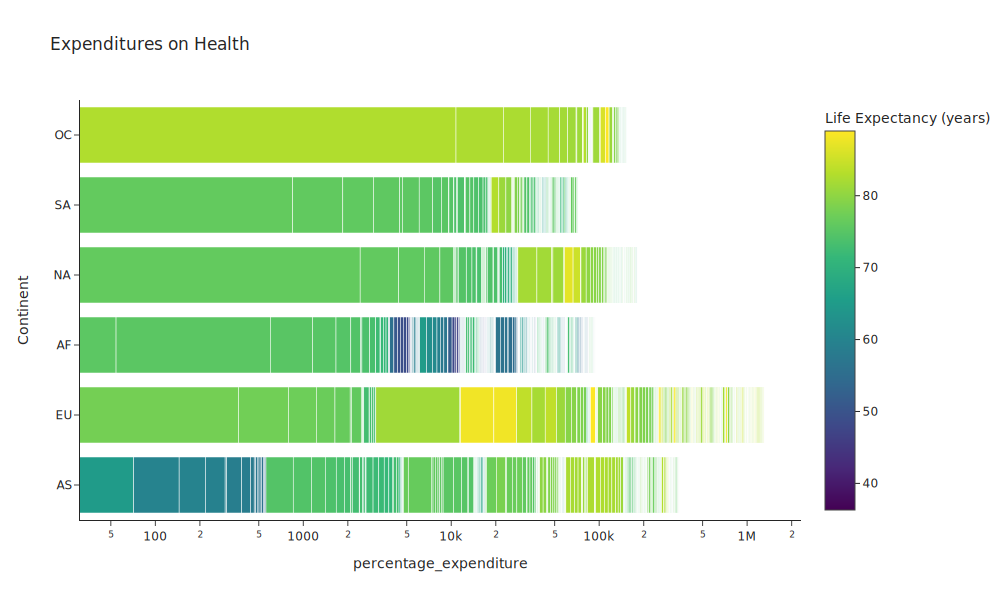

In [26]:
fig = px.bar(df, x="percentage_expenditure", y="continent", color = "life_expectancy",
                 hover_name="country",height=600, width=1000, template="simple_white", log_x = True,
                 color_discrete_sequence=px.colors.qualitative.G10,
                 title="Expenditures on Health",
                 labels=dict(
                     continent="Continent", 
                     life_expectancy="Life Expectancy (years)"))

fig.update_layout(font_family="Rockwell",
                  legend=dict(orientation="h", title="", y=1.1, x=1, xanchor="right", yanchor="bottom"))
fig.show()

It is not very clear from graph that how does percentage expenditures effect longer or shorter life span. e.g. some countries in Africa tend to longer life expectancy having lower percentage_expenditures and vice versa.  In order to understand it better, we will try to make regplot to understand it better.

In [27]:
# Breaking down dataset into 2 parts to see the difference.
developing = df[(df["status"].str.contains("Developing"))]
developed = df[(df["status"].str.contains("Developed"))]

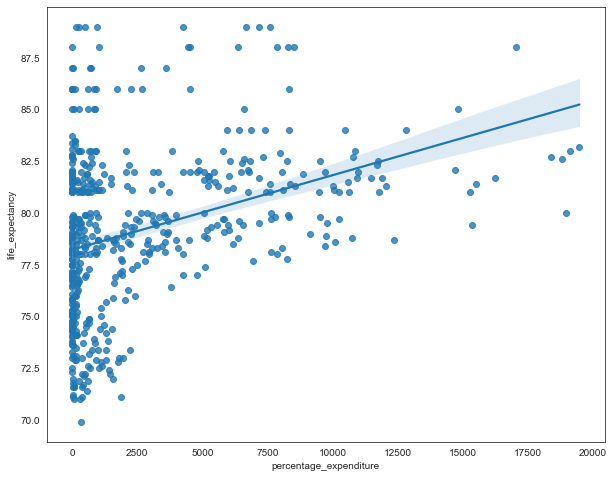

In [28]:
#Regplot for Developed countries
plt.figure(figsize=(10,8))
sns.regplot(x="percentage_expenditure",
           y="life_expectancy",
           data = developed)
plt.show()

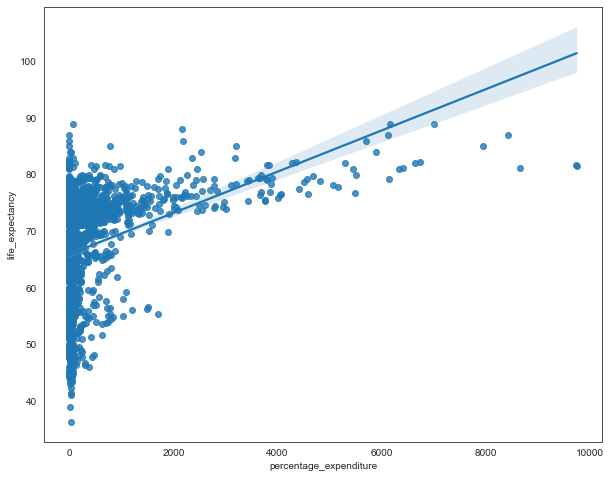

In [29]:
# regplot for developoing countries
plt.figure(figsize=(10,8))
sns.regplot(x="percentage_expenditure",
           y="life_expectancy",
           data = developing)
plt.show()

Even the reg plots does not provide any clear indication of any relationship b/w both of them.

#### Relation b/w population and Life expectancy 

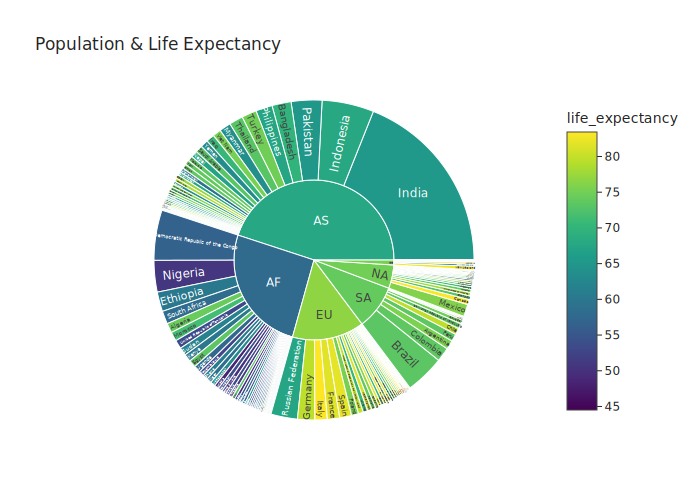

In [30]:
fig = px.sunburst(df,color = "life_expectancy", values = 'population', path=["continent", 'country'], hover_name = "country", height = 500,
                 template="simple_white", 
                 color_discrete_sequence=px.colors.qualitative.G10,
                 title="Population & Life Expectancy",
                )
fig.show()

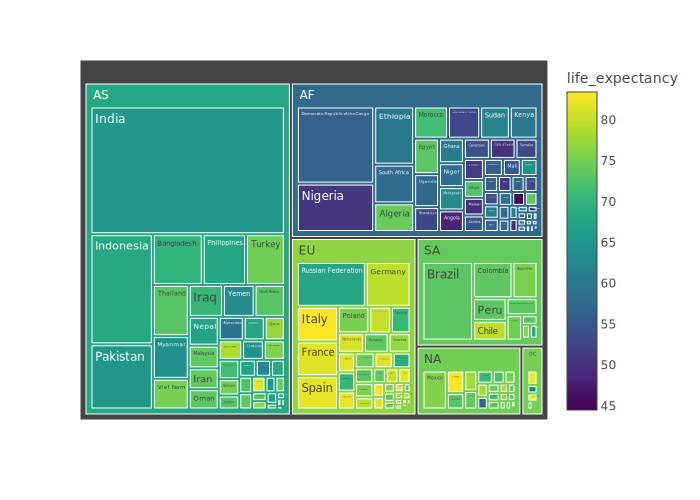

In [31]:
fig = px.treemap(df,color = "life_expectancy", values = 'population', path=["continent", 'country'], hover_name = "country", height = 500)
fig.show()

population seems to very ligtly inversely related with life expectancy, because none of highly populated countries have high life expectancy.

### Schooling and life Expactency 

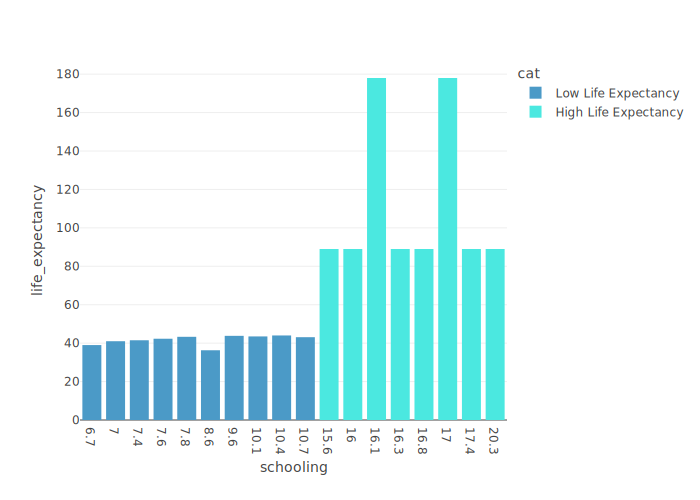

In [32]:
df2 = pd.concat(
    [
        df.nlargest(10, "life_expectancy").assign(cat="High Life Expectancy"),
        df.nsmallest(10, "life_expectancy").assign(cat="Low Life Expectancy"),
    ]
).sort_values(["schooling"])
df2["schooling bin"] = pd.cut(df2["schooling"], 6, precision=0).astype(str)

# same as in question, change to categorical
px.bar(
    df2,
    x="schooling",
    y="life_expectancy",
    color="cat",
    hover_data=["schooling", "year", "country"],
).update_layout(xaxis_type="category")

Schooling shows a very positive influence on longer life span. Education helps people to make better choices about their healh which in turn leads to longer life.

## Modeling 

now when we have explored the data enough, now its time to apply model to find out best features explaining variations in life expectancy.


In [33]:
# X-Y Split
X = df.iloc[:,[0,1,2,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21]]
y = df.iloc[:,3]
# Dummification 
X = pd.get_dummies(X, drop_first = True)
#Split Train and test data set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.25, random_state=42)

In [34]:
#Split Train and test data set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.25, random_state=42)
xtrain = X_train # it is done in order to plot features

In [35]:
#Fitting and transforming Data
from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()
X_train = sc_x.fit_transform(X_train)
X_test =  sc_x.transform(X_test)

In [36]:
# Model application
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(X_train,y_train)

LinearRegression()

### Model Validation and Visualization

In [37]:
y_train_pred = reg.predict(X_train)
y_test_pred = reg.predict(X_test)
predictions_train = reg.predict(X_train)
predictions_test = reg.predict(X_test)

In [38]:

from sklearn.metrics import r2_score
display(r2_score(y_train,predictions_train))
display(r2_score(y_test,predictions_test))

0.9652703941042595

0.9552742849284338

R2 score for both train and test set shows that model is fitting very well for both train and test dataset.

In [39]:
from sklearn.metrics import mean_squared_error

display(mean_squared_error(y_train,predictions_train))
display(mean_squared_error(y_test,predictions_test))

display(mean_squared_error(y_test,predictions_test,squared = False))
display(mean_squared_error(y_train,predictions_train,squared = False))


3.1379724536530262

4.107894037328453

2.0267940293301767

1.7714323169833575

MSE shows RMSE are very low, which is another indication of very good model.

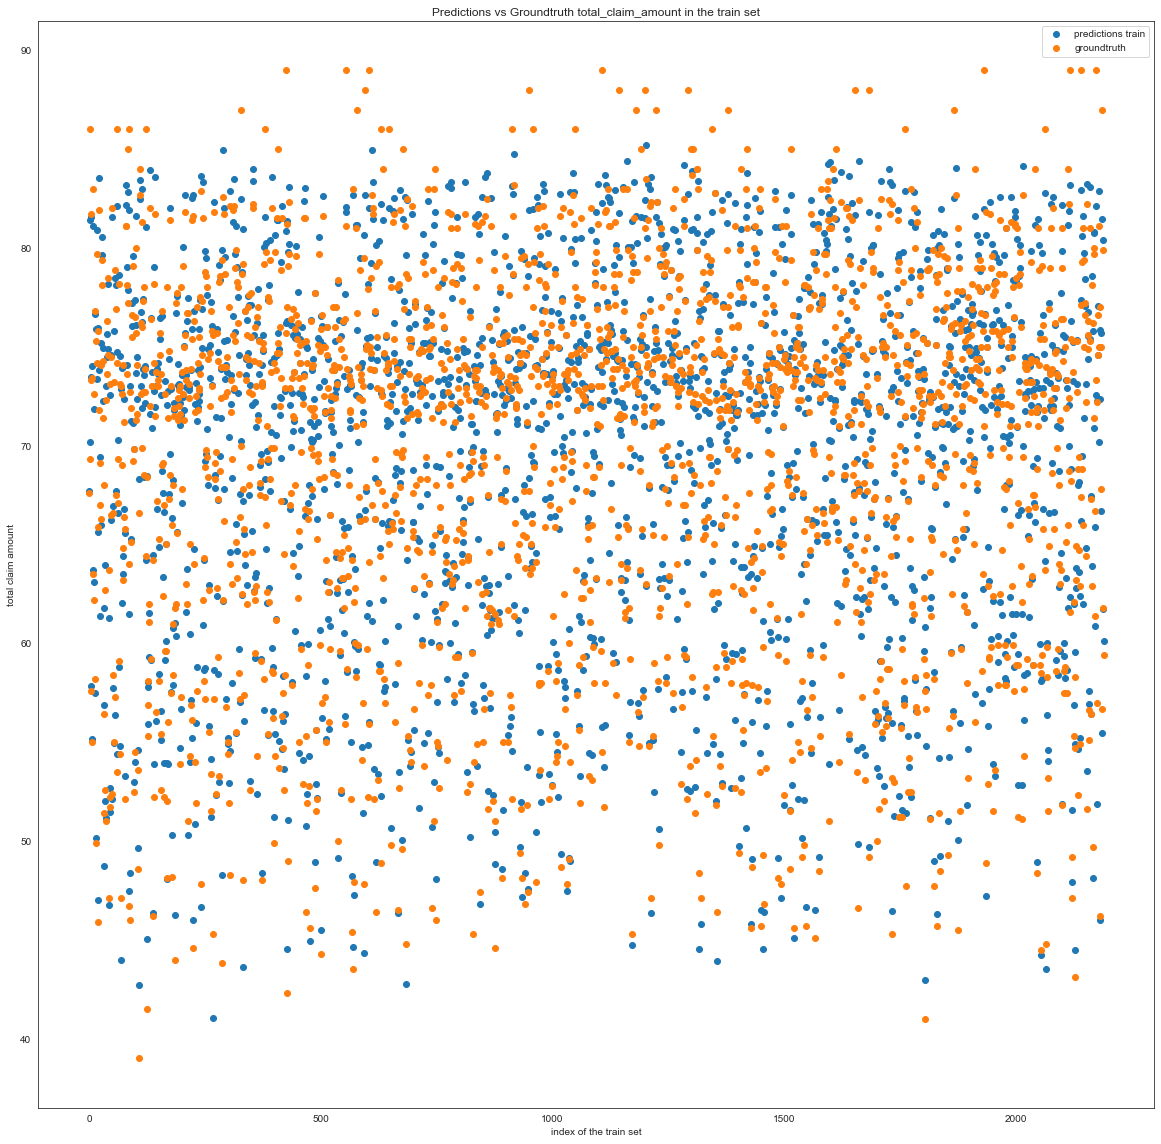

In [40]:
x = y_train_pred
y = y_train
t = np.arange(0,x.size)


import matplotlib.pyplot as plt

#create the figure and axes object
fig, ax = plt.subplots(figsize=(20,20))

plt.scatter(t,x)
plt.scatter(t,y)

# Add Title
plt.title("Predictions vs Groundtruth total_claim_amount in the train set") 

# Add Axes Labels
plt.xlabel("index of the train set") 
plt.ylabel("total claim amount") 


# Function add a legend  
plt.legend(["predictions train", "groundtruth"], loc ="upper right")
# Display

plt.show()

actual and predicted values are very close to each other, confirming that model is predicting very well.

### Feature Importance 

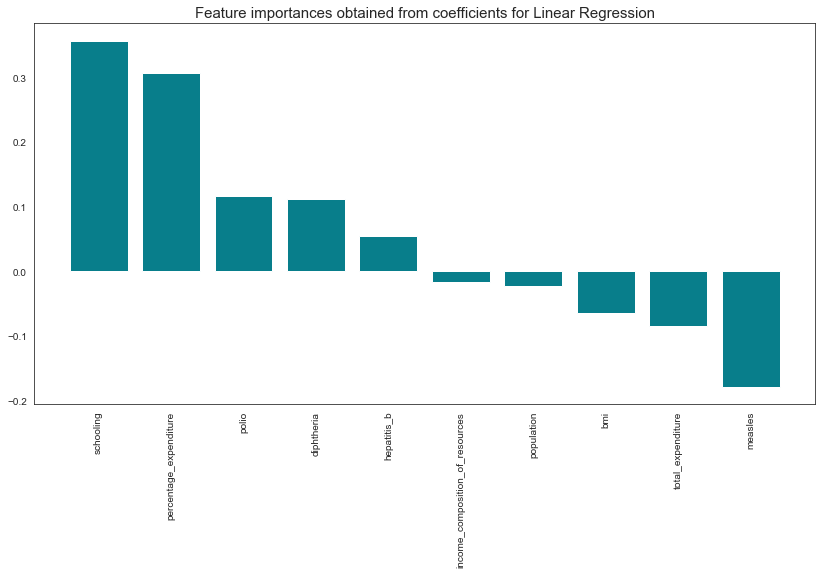

In [41]:
from matplotlib import pyplot


importances = pd.DataFrame(data={
    'Attribute': xtrain.columns,
    'Importance': reg.coef_
})


importances = importances[importances["Attribute"].str.contains("country") == False]
importances = importances[importances["Attribute"].str.contains("year") == False]
importances = importances[importances["Attribute"].str.contains("infant_deaths") == False]
importances = importances[importances["Attribute"].str.contains("status_Developing") == False]
importances = importances.sort_values(by='Importance', ascending=False).head(10)

plt.rcParams["figure.figsize"] = (14,7)

plt.bar(x=importances['Attribute'], height=importances['Importance'], color='#087E8B')
plt.title('Feature importances obtained from coefficients for Linear Regression', size=15)
plt.xticks(rotation='vertical')
plt.show()


Plot shows top 10 most important features for the model. Country, year, infant_deaths, and status_developing has been removed from the plot because their coefficients were too high, due to which we can't observe other important features.

1.positive correlation coefficients of polio and diphtheria needs further investigation. they should have inverse relationship with life expectancy

2. In order to improve life expectancy, govts around the world needs to improve education, and percentage expenditures on health sector. 
3. Enough steps should be taken in order to control diseases around the world.
4. Polio, diphtheria, Hepatitis_B  are very important and postively related features that model has predicted. It needs further investigation. It can't be true.

### Logistic Regression for Binary Classification

Now when we have observed the relationship b/w life_expectancy and other explanatory variables, and concluded that selected variables are very good predictors for life_expectancy. We try to use the same dataset,and  try to anaylize if the same variables are good enough to make distinction in status of a country.For that purpose we will use all numerical variables as explanatory variables and categorical variables namely 'status' will be our target variable.

In [42]:
#data into binary transformation
df['status'] = [1 if b=='Developing' else 0 for b in df.status]
df['status'].value_counts()

1    2410
0     512
Name: status, dtype: int64

In [43]:
#X-Y split
features_list = ['life_expectancy', 'adult_mortality',
       'infant_deaths', 'alcohol', 'percentage_expenditure', 'hepatitis_b',
       'measles', 'bmi', 'under-five_deaths', 'polio', 'total_expenditure',
       'diphtheria', 'hiv/aids', 'gdp', 'population', 'thinness_1-19_years',
       'thinness_5-9_years', 'income_composition_of_resources', 'schooling']
X = df.loc[:,features_list]
y = df.iloc[:,1]

In [44]:
numeric_features = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18]
categorical_features = []

In [45]:
# Scaling and transforming
numeric_transformer = StandardScaler()                                  
categorical_transformer = OneHotEncoder(drop ="first")

preprocessor=ColumnTransformer(
   transformers=[("numerical", numeric_transformer, numeric_features),
                 ("categorical",categorical_transformer, categorical_features )])
#Train test split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.33, random_state =42)
# applying transformer
X_train = preprocessor.fit_transform(X_train)
X_test = preprocessor.transform(X_test)
# fitting model
classifier = LogisticRegression()
classifier.fit(X,y)

LogisticRegression()

In [46]:
pred_train = classifier.predict(X_train)
pred_test = classifier.predict(X_test)
prob_train = classifier.predict_proba(X_train)
prob_test = classifier.predict_proba(X_test)

print("accuracy on train set: ", accuracy_score(y_train, pred_train))
print("accuracy on test set: ", accuracy_score(y_test, pred_test))


accuracy on train set:  0.5528870720490546
accuracy on test set:  0.5575129533678757


C:\Users\s_sad\AppData\Roaming\Python\Python39\site-packages\sklearn\base.py:450: UserWarning:

X does not have valid feature names, but LogisticRegression was fitted with feature names

C:\Users\s_sad\AppData\Roaming\Python\Python39\site-packages\sklearn\base.py:450: UserWarning:

X does not have valid feature names, but LogisticRegression was fitted with feature names

C:\Users\s_sad\AppData\Roaming\Python\Python39\site-packages\sklearn\base.py:450: UserWarning:

X does not have valid feature names, but LogisticRegression was fitted with feature names

C:\Users\s_sad\AppData\Roaming\Python\Python39\site-packages\sklearn\base.py:450: UserWarning:

X does not have valid feature names, but LogisticRegression was fitted with feature names



Accuracy of both train and test set is very low. now let us see confusion matrix, classifcation report to understand results better.

C:\Users\s_sad\AppData\Roaming\Python\Python39\site-packages\sklearn\base.py:450: UserWarning:

X does not have valid feature names, but LogisticRegression was fitted with feature names



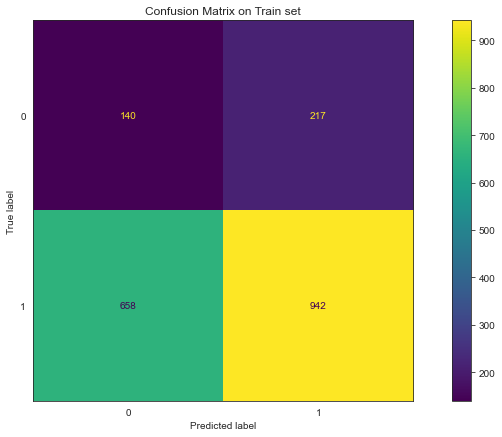

C:\Users\s_sad\AppData\Roaming\Python\Python39\site-packages\sklearn\base.py:450: UserWarning:

X does not have valid feature names, but LogisticRegression was fitted with feature names



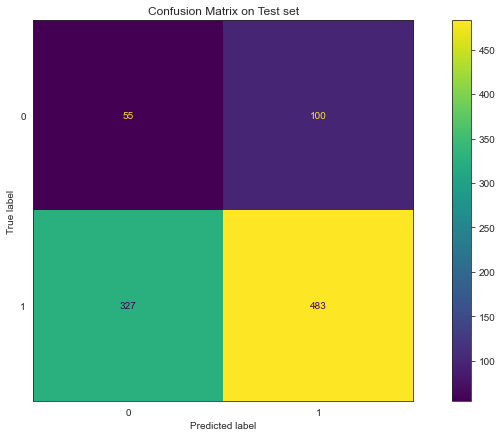

In [47]:
## confusion matrices train/test sets

# Visualize confusion matrices
_ , ax = plt.subplots() # Get subplot from matplotlib
ax.set(title="Confusion Matrix on Train set") # Set a title that we will add into ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(classifier, X_train, y_train, ax=ax) # ConfusionMatrixDisplay from sklearn
plt.show()

_ , ax = plt.subplots() # Get subplot from matplotlib
ax.set(title="Confusion Matrix on Test set") # Set a title that we will add into ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(classifier, X_test, y_test, ax=ax) # ConfusionMatrixDisplay from sklearn
plt.show()

In [48]:
print("f1 score on train set: ", f1_score(y_train, pred_train))
print("f1 score on test set: ", f1_score(y_test, pred_test))

from sklearn.metrics import classification_report
print(classification_report(y_train, pred_train))

print(classification_report(y_test, pred_test))

f1 score on train set:  0.6828561072852484
f1 score on test set:  0.6934673366834172
              precision    recall  f1-score   support

           0       0.18      0.39      0.24       357
           1       0.81      0.59      0.68      1600

    accuracy                           0.55      1957
   macro avg       0.49      0.49      0.46      1957
weighted avg       0.70      0.55      0.60      1957

              precision    recall  f1-score   support

           0       0.14      0.35      0.20       155
           1       0.83      0.60      0.69       810

    accuracy                           0.56       965
   macro avg       0.49      0.48      0.45       965
weighted avg       0.72      0.56      0.61       965



F1 Score is fine nearly 70%.
Model is predicting well for class 1 which are developing countries as shown from values of precision(0.81) and recall(0.70) for train data and similar trend follows for test data.
Model is not predicting well class 0(developed countries) also visible in recall, precision and f1 score.

C:\Users\s_sad\AppData\Roaming\Python\Python39\site-packages\sklearn\base.py:450: UserWarning:

X does not have valid feature names, but LogisticRegression was fitted with feature names



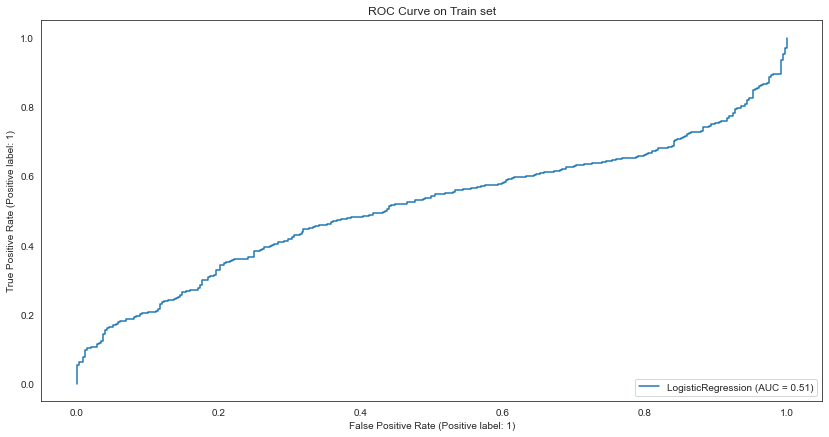

C:\Users\s_sad\AppData\Roaming\Python\Python39\site-packages\sklearn\base.py:450: UserWarning:

X does not have valid feature names, but LogisticRegression was fitted with feature names



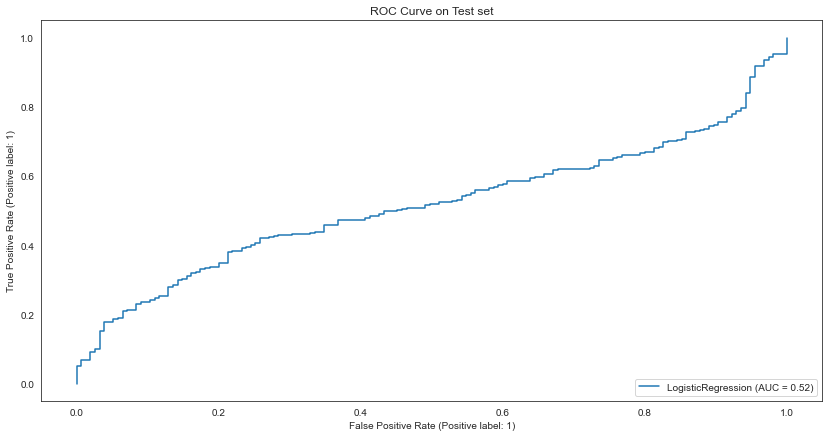

In [49]:
# Visualize ROC curves
_ , ax = plt.subplots() # Get subplot from matplotlib
ax.set(title="ROC Curve on Train set") # Set a title that we will add into ConfusionMatrixDisplay
RocCurveDisplay.from_estimator(classifier, X_train, y_train, ax=ax) # RocCurveDisplay from sklearn
plt.show()

_ , ax = plt.subplots() # Get subplot from matplotlib
ax.set(title="ROC Curve on Test set") # Set a title that we will add into ConfusionMatrixDisplay
RocCurveDisplay.from_estimator(classifier, X_test, y_test, ax=ax) # RocCurveDisplay from sklearn
plt.show()

### Model improvement(Resampling)¶

As above model is not very working very good, only predicting one class very well.  So let us try to see the problem. Firstly we try to check the size of each class, which is very imbalance.In order to improve the results 2 sampling technqiues have been used in order to remove problem of imbalance dataset. 

In [50]:
df['status'].value_counts() # class 0 is just 17% of total dataset.

1    2410
0     512
Name: status, dtype: int64

### Upsampling 

By using this technique we will try to increase no. of obeservations for undersampled class(0). We will try to equalize it the other class and see if result improves.

In [51]:
from sklearn.utils import resample

In [52]:
df_majority = df[df.status==1]
df_minority = df[df.status==0]

In [53]:
df_minority_upsampled = resample(df_minority, 
                                 replace=True,     # sample with replacement
                                 n_samples=2410,    # to match majority class
                                 ) # reproducible results

df_upsampled = pd.concat([df_majority, df_minority_upsampled])
 
# Display new class counts
df_upsampled.status.value_counts()


1    2410
0    2410
Name: status, dtype: int64

In [54]:
# Spliting X and Y
features_list_upsampled = ['life_expectancy', 'adult_mortality',
       'infant_deaths', 'alcohol', 'percentage_expenditure', 'hepatitis_b',
       'measles', 'bmi', 'under-five_deaths', 'polio', 'total_expenditure',
       'diphtheria', 'hiv/aids', 'gdp', 'population', 'thinness_1-19_years',
       'thinness_5-9_years', 'income_composition_of_resources', 'schooling']
X_up = df_upsampled.loc[:,features_list_upsampled]
y_up = df_upsampled.loc[:,'status']

In [55]:
#splitting numerical and categorical features.
numeric_features_up = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18]
categorical_features_up = []

In [56]:
# applying transformations to numerical and categorical features
numeric_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(drop ="first")

preprocessor=ColumnTransformer(
   transformers=[("numerical", numeric_transformer, numeric_features_up),
                 ("categorical",categorical_transformer, categorical_features_up)])

In [57]:
#splilting train test and test set
X_up_train, X_up_test, y_up_train, y_up_test = train_test_split(X_up,y_up, test_size = 0.33, random_state =42)

In [58]:
# applying preprocesor
X_up_train = preprocessor.fit_transform(X_up_train)
X_up_test = preprocessor.transform(X_up_test)

In [59]:
# applying model
classifier = LogisticRegression()
classifier.fit(X_up, y_up)


LogisticRegression()

In [60]:
# predictions on train and test data sets
pred_train = classifier.predict(X_up_train)
prob_train = classifier.predict_proba(X_up_train)

pred_test = classifier.predict(X_up_test)
prob_test = classifier.predict_proba(X_up_test)


C:\Users\s_sad\AppData\Roaming\Python\Python39\site-packages\sklearn\base.py:450: UserWarning:

X does not have valid feature names, but LogisticRegression was fitted with feature names

C:\Users\s_sad\AppData\Roaming\Python\Python39\site-packages\sklearn\base.py:450: UserWarning:

X does not have valid feature names, but LogisticRegression was fitted with feature names

C:\Users\s_sad\AppData\Roaming\Python\Python39\site-packages\sklearn\base.py:450: UserWarning:

X does not have valid feature names, but LogisticRegression was fitted with feature names

C:\Users\s_sad\AppData\Roaming\Python\Python39\site-packages\sklearn\base.py:450: UserWarning:

X does not have valid feature names, but LogisticRegression was fitted with feature names



In [61]:
# Model accuracy
print("accuracy on train set: ", accuracy_score(y_up_train, pred_train))
print("accuracy on test set: ", accuracy_score(y_up_test, pred_test))

accuracy on train set:  0.6776091669247445
accuracy on test set:  0.6561910747957259


By using up sampling technique we can already see an improvement in model accuracy score. Let us now try to observe rest of results

C:\Users\s_sad\AppData\Roaming\Python\Python39\site-packages\sklearn\base.py:450: UserWarning:

X does not have valid feature names, but LogisticRegression was fitted with feature names



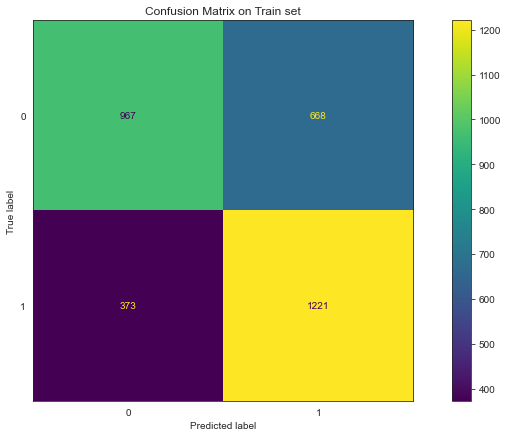

C:\Users\s_sad\AppData\Roaming\Python\Python39\site-packages\sklearn\base.py:450: UserWarning:

X does not have valid feature names, but LogisticRegression was fitted with feature names



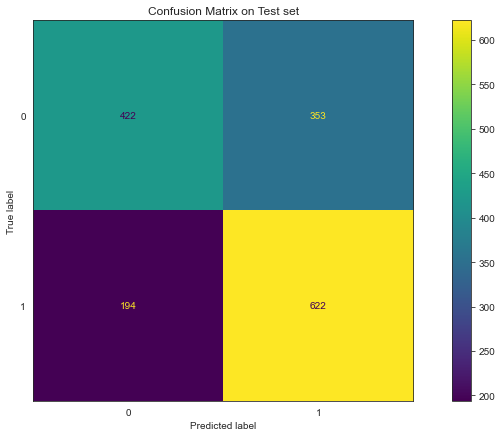

In [62]:
#Visualize confusion matrices
_ , ax = plt.subplots() # Get subplot from matplotlib
ax.set(title="Confusion Matrix on Train set") # Set a title that we will add into ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(classifier, X_up_train, y_up_train, ax=ax) # ConfusionMatrixDisplay from sklearn
plt.show()

_ , ax = plt.subplots() # Get subplot from matplotlib
ax.set(title="Confusion Matrix on Test set") # Set a title that we will add into ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(classifier, X_up_test, y_up_test, ax=ax) # ConfusionMatrixDisplay from sklearn
plt.show()

In [63]:
from sklearn.metrics import classification_report

In [64]:
print(classification_report(y_up_train, pred_train))

print(classification_report(y_up_test, pred_test))

              precision    recall  f1-score   support

           0       0.72      0.59      0.65      1635
           1       0.65      0.77      0.70      1594

    accuracy                           0.68      3229
   macro avg       0.68      0.68      0.68      3229
weighted avg       0.68      0.68      0.68      3229

              precision    recall  f1-score   support

           0       0.69      0.54      0.61       775
           1       0.64      0.76      0.69       816

    accuracy                           0.66      1591
   macro avg       0.66      0.65      0.65      1591
weighted avg       0.66      0.66      0.65      1591



Model is predicting well for class 1 which are developing countries as shown from values of precision(0.64) and recall(0.76) for train data and similar trend follows for test data.
Model is also predicting well class 0(developed countries), precision = 0.71, recall = 0.58.
f1 score is also nearly 70%. 
So resampling has improved our model a lot.

C:\Users\s_sad\AppData\Roaming\Python\Python39\site-packages\sklearn\base.py:450: UserWarning:

X does not have valid feature names, but LogisticRegression was fitted with feature names



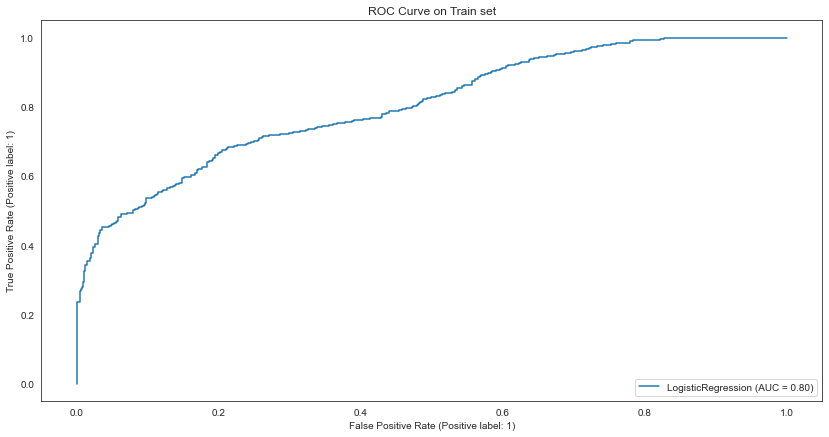

C:\Users\s_sad\AppData\Roaming\Python\Python39\site-packages\sklearn\base.py:450: UserWarning:

X does not have valid feature names, but LogisticRegression was fitted with feature names



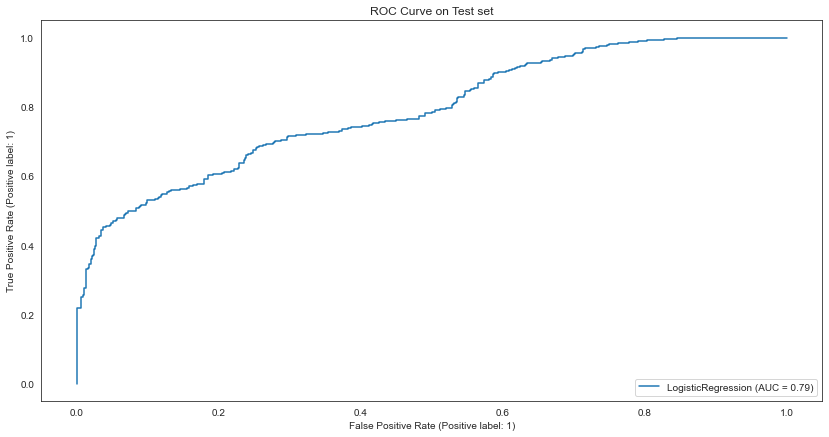

In [65]:
# Visualize ROC curves
_ , ax = plt.subplots() # Get subplot from matplotlib
ax.set(title="ROC Curve on Train set") # Set a title that we will add into ConfusionMatrixDisplay
RocCurveDisplay.from_estimator(classifier, X_up_train, y_up_train, ax=ax) # RocCurveDisplay from sklearn
plt.show()

_ , ax = plt.subplots() # Get subplot from matplotlib
ax.set(title="ROC Curve on Test set") # Set a title that we will add into ConfusionMatrixDisplay
RocCurveDisplay.from_estimator(classifier, X_up_test, y_up_test, ax=ax) # RocCurveDisplay from sklearn
plt.show()

### Downsampling 

In downsampling, we will try to equalize number of observations to minority class and see if it gives better results.

In [66]:
# Separate majority and minority classes
df_majority = df[df.status==1]
df_minority = df[df.status==0]
 
# Downsample majority class
df_majority_downsampled = resample(df_majority, 
                                 replace=False,    # sample without replacement
                                 n_samples=512,     # to match minority class
                                 random_state=123) # reproducible results
 
# Combine minority class with downsampled majority class
df_downsampled = pd.concat([df_majority_downsampled, df_minority])
 
# Display new class counts
df_downsampled.status.value_counts()

1    512
0    512
Name: status, dtype: int64

In [67]:
# spliting x and y
features_list_downsampled = ['life_expectancy', 'adult_mortality',
       'infant_deaths', 'alcohol', 'percentage_expenditure', 'hepatitis_b',
       'measles', 'bmi', 'under-five_deaths', 'polio', 'total_expenditure',
       'diphtheria', 'hiv/aids', 'gdp', 'population', 'thinness_1-19_years',
       'thinness_5-9_years', 'income_composition_of_resources', 'schooling']
X_down = df_downsampled.loc[:,features_list_downsampled]
y_down = df_downsampled.loc[:,'status']


In [68]:
# Defining preprocessor after separting numerical and categorical features
numeric_features = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18]
categorical_features = []

numeric_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(drop ="first")

preprocessor=ColumnTransformer(
   transformers=[("numerical", numeric_transformer, numeric_features),
                 ("categorical",categorical_transformer, categorical_features)])

In [69]:
# Train-Test split
X_down_train, X_down_test, y_down_train, y_down_test = train_test_split(X_down,y_down, test_size = 0.33, random_state =42)

In [70]:
# applying preprocessor 
X_down_train = preprocessor.fit_transform(X_down_train)
X_down_test = preprocessor.transform(X_down_test)

In [71]:
# Model application
classifier = LogisticRegression()
classifier.fit(X_down, y_down)

LogisticRegression()

In [72]:
pred_train = classifier.predict(X_down_train)
prob_train = classifier.predict_proba(X_down_train)


pred_test = classifier.predict(X_down_test)
prob_test = classifier.predict_proba(X_down_test)

print("accuracy on train set: ", accuracy_score(y_down_train, pred_train))
print("accuracy on test set: ", accuracy_score(y_down_test, pred_test))

accuracy on train set:  0.6953352769679301
accuracy on test set:  0.6775147928994083


C:\Users\s_sad\AppData\Roaming\Python\Python39\site-packages\sklearn\base.py:450: UserWarning:

X does not have valid feature names, but LogisticRegression was fitted with feature names

C:\Users\s_sad\AppData\Roaming\Python\Python39\site-packages\sklearn\base.py:450: UserWarning:

X does not have valid feature names, but LogisticRegression was fitted with feature names

C:\Users\s_sad\AppData\Roaming\Python\Python39\site-packages\sklearn\base.py:450: UserWarning:

X does not have valid feature names, but LogisticRegression was fitted with feature names

C:\Users\s_sad\AppData\Roaming\Python\Python39\site-packages\sklearn\base.py:450: UserWarning:

X does not have valid feature names, but LogisticRegression was fitted with feature names



C:\Users\s_sad\AppData\Roaming\Python\Python39\site-packages\sklearn\base.py:450: UserWarning:

X does not have valid feature names, but LogisticRegression was fitted with feature names



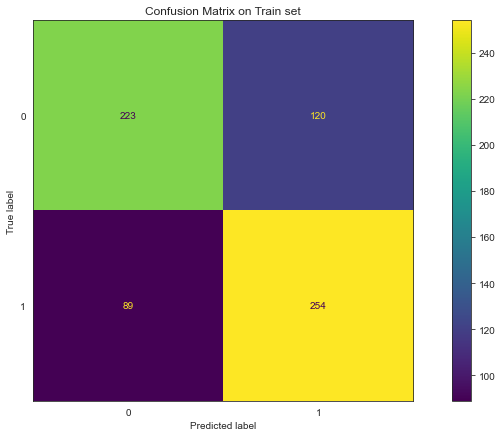

C:\Users\s_sad\AppData\Roaming\Python\Python39\site-packages\sklearn\base.py:450: UserWarning:

X does not have valid feature names, but LogisticRegression was fitted with feature names



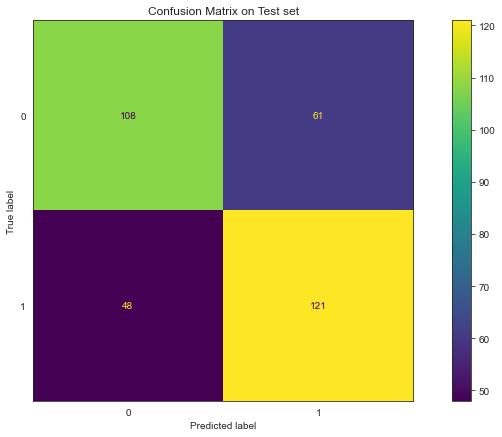

In [73]:
#Visualize confusion matrices
_ , ax = plt.subplots() # Get subplot from matplotlib
ax.set(title="Confusion Matrix on Train set") # Set a title that we will add into ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(classifier, X_down_train, y_down_train, ax=ax) # ConfusionMatrixDisplay from sklearn
plt.show()

_ , ax = plt.subplots() # Get subplot from matplotlib
ax.set(title="Confusion Matrix on Test set") # Set a title that we will add into ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(classifier, X_down_test, y_down_test, ax=ax) # ConfusionMatrixDisplay from sklearn
plt.show()

In [74]:
print(classification_report(y_down_train, pred_train))

print(classification_report(y_down_test, pred_test))

              precision    recall  f1-score   support

           0       0.71      0.65      0.68       343
           1       0.68      0.74      0.71       343

    accuracy                           0.70       686
   macro avg       0.70      0.70      0.69       686
weighted avg       0.70      0.70      0.69       686

              precision    recall  f1-score   support

           0       0.69      0.64      0.66       169
           1       0.66      0.72      0.69       169

    accuracy                           0.68       338
   macro avg       0.68      0.68      0.68       338
weighted avg       0.68      0.68      0.68       338



Here again we see that model score has improved a lot after using downsampling technique.

C:\Users\s_sad\AppData\Roaming\Python\Python39\site-packages\sklearn\base.py:450: UserWarning:

X does not have valid feature names, but LogisticRegression was fitted with feature names



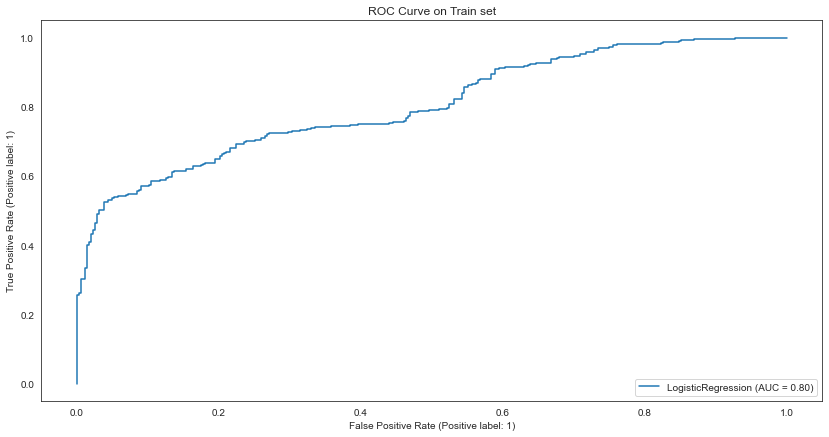

C:\Users\s_sad\AppData\Roaming\Python\Python39\site-packages\sklearn\base.py:450: UserWarning:

X does not have valid feature names, but LogisticRegression was fitted with feature names



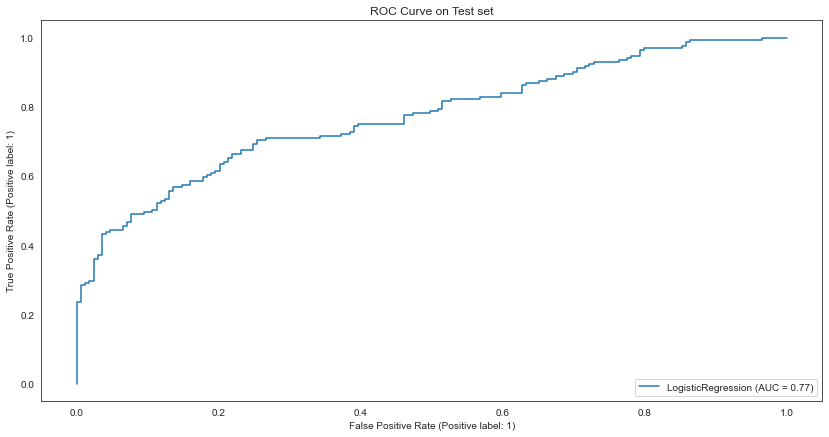

In [75]:
# Visualize ROC curves
_ , ax = plt.subplots() # Get subplot from matplotlib
ax.set(title="ROC Curve on Train set") 
RocCurveDisplay.from_estimator(classifier, X_down_train, y_down_train, ax=ax) # RocCurveDisplay from sklearn
plt.show()

_ , ax = plt.subplots() # Get subplot from matplotlib
ax.set(title="ROC Curve on Test set") 
RocCurveDisplay.from_estimator(classifier, X_down_test, y_down_test, ax=ax) # RocCurveDisplay from sklearn
plt.show()

AUC for up and down sampling also have nearly 80% score, confirming that model is good to distinguish b/w two classes.

### Feature Importance

In [76]:
from sklearn.feature_selection import RFE
predictors = X_down_train
selector = RFE(classifier,n_features_to_select = 1)
selector = selector.fit(predictors,y_down_train)

order = selector.ranking_

feature_ranks = []
for i in order:
    feature_ranks.append(f"{i},{df.columns[i]}")
feature_ranks


['3,life_expectancy',
 '13,total_expenditure',
 '10,bmi',
 '4,adult_mortality',
 '8,hepatitis_b',
 '12,polio',
 '17,population',
 '19,thinness_5-9_years',
 '14,diphtheria',
 '18,thinness_1-19_years',
 '15,hiv/aids',
 '16,gdp',
 '9,measles',
 '7,percentage_expenditure',
 '5,infant_deaths',
 '1,status',
 '6,alcohol',
 '2,year',
 '11,under-five_deaths']

### Conclusion 

1. Explanatory variables chosen for anaylsis were very good to explain variations in target variable. 
2. Linear regression fitted very well without any changes while for logistic regression, the model fitted well after some modification in sample size. 
3. For linear model, some unreasonable relationships were found, they needs to be investigated further.